713it [01:13,  9.67it/s]                                                                                               


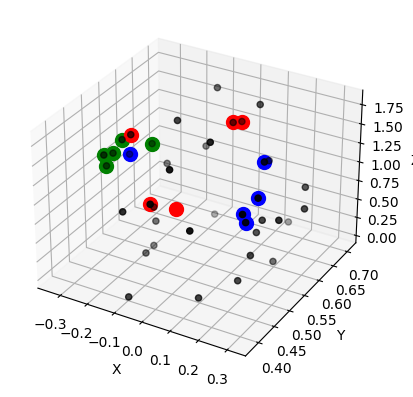

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Load the .npz file with allow_pickle=True
with np.load('D:\\Dataset\\3D-pointcloud\\ACCAD\\Male1Running_c3d\\Run_C24_-_quick_side_step_left_stageii.npz', allow_pickle=True) as data:
    # Extract the 3D point cloud data (replace 'markers' with the actual key for your point cloud data)
    point_cloud_data = data['markers']

    
# Initialize tqdm progress bar
pbar = tqdm(total=len(point_cloud_data))

# Initialize the scatter plot
sc = ax.scatter([], [], [])

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Animation')

# Update function
def update(frame):
    global pbar  # Make sure to use the global pbar variable
    ax.clear()
    x = point_cloud_data[frame][:, 0]
    y = point_cloud_data[frame][:, 1]
    z = point_cloud_data[frame][:, 2]
    
    # Indices for three groups
    group1_indices = list(range(5, 10))
    group2_indices = list(range(10, 15))
    group3_indices = list(range(15, 20))
    
    ax.scatter(x, y, z, c='k', marker='o')
    
    for idx in group1_indices:
        ax.scatter(x[idx], y[idx], z[idx], c='r', marker='o', s=100)
        
    for idx in group2_indices:
        ax.scatter(x[idx], y[idx], z[idx], c='g', marker='o', s=100)
        
    for idx in group3_indices:
        ax.scatter(x[idx], y[idx], z[idx], c='b', marker='o', s=100)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    pbar.update(1)  # Update the progress bar

# Create the animation 2x faster
ani = FuncAnimation(fig, update, frames=range(0, len(point_cloud_data)), interval=25)

# Save the animation
ani.save('3D_Point_Cloud_Grouped_Animation_Faster.mp4', writer='ffmpeg', progress_callback=lambda i, n: pbar.update(1))

# Close the progress bar
pbar.close()

# Show the plot
plt.show()